In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='paper')

In [34]:
import os
dpath = 'trait_gene_annotations'
os.listdir(dpath)

['10cc_experimental_traits.xlsx',
 '42003_2022_3184_MOESM4_ESM_select_genomes.xlsx',
 'brenda_2024_1.json.tar.gz',
 'brenda_results_extracellluar enzymes.xlsx',
 'genetic_traits_table.tsv',
 'genetic_traits_table_filtered.tsv',
 'genomes_annotation_long_format.7z',
 'kegg_pathways.csv',
 'MASTER_table.tsv',
 'N related  enzymes.xlsx',
 'ROS related  enzymes.xlsx',
 'strain_list.csv']

In [35]:
df = pd.read_csv('10cc_ecpath_master.csv')

In [36]:
df. head()

,filename,locus_tag,type,start,end,strand,gene,product,db_xref,EC_number,...,antiSMASH,BioV_transp,blast_phytohormones,blast_vibrioferrin,blast_DMSP,dbCAN_CAZy,Species,recommended_name,systematic_name,synonyms
0,1402135.12,ALGBIFEJ_00001,CDS,7,408,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
1,1402135.12,ALGBIFEJ_00002,CDS,405,806,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
2,1402135.12,ALGBIFEJ_00003,CDS,803,1381,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
3,1402135.12,ALGBIFEJ_00004,CDS,1378,2424,+,NaN,hypothetical protein,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,NaN,NaN,NaN
4,1402135.12,ALGBIFEJ_00005,CDS,2501,4750,+,fadE,Acyl-coenzyme A dehydrogenase,COG:COG1960,1.3.8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,Sulfitobacter pseudonitzschiae strain SMR1,medium-chain acyl-CoA dehydrogenase,medium-chain acyl-CoA:electron-transfer flavop...,acyl dehydrogenase;medium-chain acyl CoA dehyd...


In [37]:
df.columns

Index(['filename', 'locus_tag', 'type', 'start', 'end', 'strand', 'gene',
       'product', 'db_xref', 'EC_number', 'KO', 'KEGG_KM', 'KEGG_manual',
       'antiSMASH', 'BioV_transp', 'blast_phytohormones', 'blast_vibrioferrin',
       'blast_DMSP', 'dbCAN_CAZy', 'Species', 'recommended_name',
       'systematic_name', 'synonyms'],
      dtype='object')

In [76]:
ec_df = df.pivot_table(
    columns='Species', 
    index=['EC_number', 'recommended_name', 'systematic_name', 'synonyms', 'KO'],
    values='filename', aggfunc='count', fill_value=0,
)

In [77]:
ec_df.isna().sum(axis=1).value_counts()

0    1602
Name: count, dtype: int64

C:\Users\Osnat\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Osnat\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


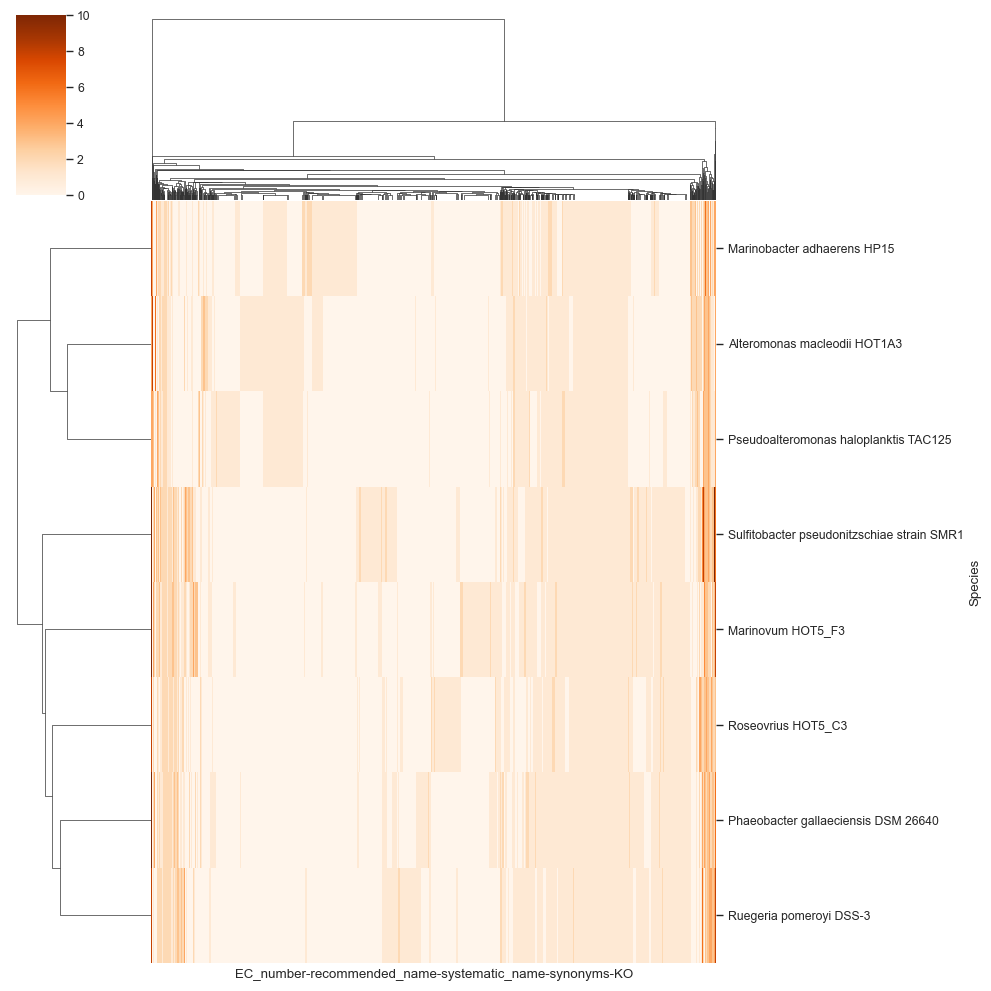

In [78]:
sns.clustermap(ec_df.T, xticklabels=[], vmax=10, cmap='Oranges')

In [79]:
ec_df.to_csv('10cc_EC.csv')

In [80]:
selected_ecs = pd.read_excel(os.path.join(dpath,'brenda_results_extracellluar enzymes.xlsx'))

In [81]:
second_selected_ecs =  pd.read_excel(os.path.join(dpath,'N related  enzymes.xlsx'))

In [82]:
third_selected_kos =  pd.read_excel(os.path.join(dpath,'ROS related  enzymes.xlsx',))


In [83]:
ec_df = ec_df.reset_index(drop=False)



In [84]:
ec_df.columns

Index(['EC_number', 'recommended_name', 'systematic_name', 'synonyms', 'KO',
       'Alteromonas macleodii HOT1A3', 'Marinobacter adhaerens HP15',
       'Marinovum HOT5_F3', 'Phaeobacter gallaeciensis DSM 26640',
       'Pseudoalteromonas haloplanktis TAC125', 'Roseovrius HOT5_C3',
       'Ruegeria pomeroyi DSS-3',
       'Sulfitobacter pseudonitzschiae strain SMR1'],
      dtype='object', name='Species')

In [85]:
ec_df['EC_number_x'] = ec_df['EC_number'].str.replace(r'\.(\d+)$', '.x', regex=True)
ec_df['EC_number_x_x'] = ec_df['EC_number_x'].str.replace(r'\.(\d+).x$', '.x.x', regex=True)
ec_df

Species,EC_number,recommended_name,systematic_name,synonyms,KO,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number_x,EC_number_x_x
0,1.1.1.1,alcohol dehydrogenase,alcohol:NAD+ oxidoreductase,ethanol dehydrogenase;sec-ADH A;CHY1186;class ...,K00344,1,0,0,1,0,0,0,0,1.1.1.x,1.1.x.x
1,1.1.1.1,alcohol dehydrogenase,alcohol:NAD+ oxidoreductase,ethanol dehydrogenase;sec-ADH A;CHY1186;class ...,K13953,0,0,0,0,1,0,0,0,1.1.1.x,1.1.x.x
2,1.1.1.1,alcohol dehydrogenase,alcohol:NAD+ oxidoreductase,ethanol dehydrogenase;sec-ADH A;CHY1186;class ...,K18382,0,0,1,0,0,0,0,0,1.1.1.x,1.1.x.x
3,1.1.1.100,3-oxoacyl-[acyl-carrier-protein] reductase,(3R)-3-hydroxyacyl-[acyl-carrier protein]:NADP...,3-ketoacyl-ACP reductase/3R-hydroxyacyl-CoA de...,K00023,0,0,0,0,0,1,0,0,1.1.1.x,1.1.x.x
4,1.1.1.100,3-oxoacyl-[acyl-carrier-protein] reductase,(3R)-3-hydroxyacyl-[acyl-carrier protein]:NADP...,3-ketoacyl-ACP reductase/3R-hydroxyacyl-CoA de...,K00059,1,3,2,2,3,2,1,4,1.1.1.x,1.1.x.x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K06074,1,0,0,0,0,0,0,0,7.6.2.x,7.6.x.x
1598,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K11607,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x
1599,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17204,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x
1600,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17240,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x


In [86]:
mask = np.column_stack([ec_df[col].str.contains(r"extracell", na=False, case=False) for col in ['recommended_name', 'systematic_name', 'synonyms']])
ec_df.loc[mask.any(axis=1)]

Species,EC_number,recommended_name,systematic_name,synonyms,KO,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number_x,EC_number_x_x
186,1.15.1.1,superoxide dismutase,superoxide:superoxide oxidoreductase,Mn-SOD;iron-dependent superoxide dismutase;CR1...,K00518,1,0,0,0,0,0,0,0,1.15.1.x,1.15.x.x
187,1.15.1.1,superoxide dismutase,superoxide:superoxide oxidoreductase,Mn-SOD;iron-dependent superoxide dismutase;CR1...,K04564,1,1,1,1,1,1,1,1,1.15.1.x,1.15.x.x
188,1.15.1.1,superoxide dismutase,superoxide:superoxide oxidoreductase,Mn-SOD;iron-dependent superoxide dismutase;CR1...,K04565,1,0,0,0,0,1,0,1,1.15.1.x,1.15.x.x
883,3.1.1.3,triacylglycerol lipase,triacylglycerol acylhydrolase,LipB68;lipase MY;LPL;Pancreatic lysophospholip...,K01046,1,2,0,0,0,0,0,0,3.1.1.x,3.1.x.x
902,3.1.3.1,alkaline phosphatase,phosphate-monoester phosphohydrolase (alkaline...,TNSALP;non-specific alkaline phosphatase;phosp...,K01077,1,0,0,0,1,0,0,0,3.1.3.x,3.1.x.x
903,3.1.3.1,alkaline phosphatase,phosphate-monoester phosphohydrolase (alkaline...,TNSALP;non-specific alkaline phosphatase;phosp...,K01113,1,0,0,0,0,0,1,0,3.1.3.x,3.1.x.x
1176,4.2.1.1,carbonic anhydrase,carbonic acid hydro-lyase (carbon-dioxide-form...,Rv1248;hCA VI;CaNce103;B13-CA;hCAII;pentraxin-...,K01673,1,1,1,1,1,1,1,1,4.2.1.x,4.2.x.x


In [87]:
mask = np.column_stack([ec_df[col].str.contains(r"peptidase", na=False, case=False) for col in ['recommended_name', 'systematic_name', 'synonyms']])
ec_df.loc[mask.any(axis=1)]

Species,EC_number,recommended_name,systematic_name,synonyms,KO,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number_x,EC_number_x_x
557,2.3.2.2,gamma-glutamyltransferase,(5-L-glutamyl)-peptide:amino-acid 5-glutamyltr...,gamma-glutamyl-transpeptidase;gamma-glutamyltr...,K00681,1,0,0,0,0,0,0,3,2.3.2.x,2.3.x.x
567,2.4.1.129,peptidoglycan glycosyltransferase,[poly-N-acetyl-D-glucosaminyl-(1->4)-(N-acetyl...,peptidoglycan transglycosylase;MGT;PBP-1A;clas...,K03588,1,1,0,0,1,0,0,0,2.4.1.x,2.4.x.x
568,2.4.1.129,peptidoglycan glycosyltransferase,[poly-N-acetyl-D-glucosaminyl-(1->4)-(N-acetyl...,peptidoglycan transglycosylase;MGT;PBP-1A;clas...,K03814,0,1,1,1,0,1,1,1,2.4.1.x,2.4.x.x
569,2.4.1.129,peptidoglycan glycosyltransferase,[poly-N-acetyl-D-glucosaminyl-(1->4)-(N-acetyl...,peptidoglycan transglycosylase;MGT;PBP-1A;clas...,K05366,0,0,0,0,0,1,1,1,2.4.1.x,2.4.x.x
570,2.4.1.129,peptidoglycan glycosyltransferase,[poly-N-acetyl-D-glucosaminyl-(1->4)-(N-acetyl...,peptidoglycan transglycosylase;MGT;PBP-1A;clas...,K05367,0,0,0,1,0,0,1,1,2.4.1.x,2.4.x.x
571,2.4.1.129,peptidoglycan glycosyltransferase,[poly-N-acetyl-D-glucosaminyl-(1->4)-(N-acetyl...,peptidoglycan transglycosylase;MGT;PBP-1A;clas...,K05837,1,1,1,1,1,1,1,1,2.4.1.x,2.4.x.x
1021,3.5.2.2,dihydropyrimidinase,"5,6-dihydropyrimidine amidohydrolase",HDT;D-hydantoinase;hyuH;PA0441;dihydropyrimidi...,K01464,0,0,1,1,0,1,1,1,3.5.2.x,3.5.x.x


In [88]:
ec_df_with_ann = pd.merge(ec_df, selected_ecs[['EC_number','category']], 
         left_on='EC_number', right_on='EC_number', how='left')

In [89]:
second_selected_ecs

,category,N Enzyme name,EC numbers,Unnamed: 3
0,Membrane transporters,Membrane transporters,3.6.3,NaN
1,Membrane transporters,Polar-amino-acid-transporting ATPase,3.6.3.21,NaN
2,Membrane transporters,Nonpolar-amino-acid-transporting ATPase,3.6.3.22,NaN
3,Membrane transporters,Oligopeptide-transporting ATPase,3.6.3.23,NaN
4,Membrane transporters,Nitrate-transporting ATPase,3.6.3.26,NaN
...,...,...,...,...
73,Other enzymes relevant to N cycling,Citrate synthase,2.3.3.8,NaN
74,Other enzymes relevant to N cycling,Carbon–nitrogen lyases,4.3.x.x,NaN
75,Other enzymes relevant to N cycling,Forming carbon–nitrogen bonds,6.3.x.x,NaN
76,Other enzymes relevant to N cycling,"Acting on carbon-nitrogen bonds, other than pe...",3.5.x.x,NaN


In [90]:
ec_df_with_ann_ = pd.merge(ec_df_with_ann, second_selected_ecs[['EC numbers','category', 'N Enzyme name']], 
         left_on='EC_number', right_on='EC numbers', how='left')

matched_ids = ec_df_with_ann_.loc[~ec_df_with_ann_['EC numbers'].isna(), 'EC_number'].dropna()

ec_df_with_ann_x = pd.merge(
    ec_df_with_ann.loc[~ec_df_with_ann['EC_number'].isin(matched_ids)],                        
    second_selected_ecs[['EC numbers','category', 'N Enzyme name']], 
    left_on='EC_number_x', right_on='EC numbers', how='left')
matched_ids_x = ec_df_with_ann_x.loc[~ec_df_with_ann_x['EC numbers'].isna(), 'EC_number'].dropna()

ec_df_with_ann_x_x = pd.merge(
    ec_df_with_ann.loc[
        ~ec_df_with_ann['EC_number'].isin(matched_ids) & 
        ~ec_df_with_ann['EC_number'].isin(matched_ids_x) 
    ],
    second_selected_ecs[['EC numbers','category', 'N Enzyme name']], 
    left_on='EC_number_x_x', right_on='EC numbers', how='left')

ec_df_with_ann1 = pd.concat([
    ec_df_with_ann_.loc[ec_df_with_ann_['EC_number'].isin(matched_ids)],                        
    ec_df_with_ann_x.loc[ec_df_with_ann_x['EC_number'].isin(matched_ids_x)],                        
    ec_df_with_ann_x_x,
], ignore_index=True)







In [91]:
ec_df_with_ann1

,EC_number,recommended_name,systematic_name,synonyms,KO,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,Roseovrius HOT5_C3,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number_x,EC_number_x_x,category_x,EC numbers,category_y,N Enzyme name
0,1.1.1.42,isocitrate dehydrogenase (NADP+),isocitrate:NADP+ oxidoreductase (decarboxylating),NADP+-isocitrate dehydrogenase;IDH-IIa;IDP1;cy...,K00030,2,0,0,0,2,0,0,0,1.1.1.x,1.1.x.x,NaN,1.1.1.42,Other enzymes relevant to N cycling,Isocitrate dehydrogenase
1,1.1.1.42,isocitrate dehydrogenase (NADP+),isocitrate:NADP+ oxidoreductase (decarboxylating),NADP+-isocitrate dehydrogenase;IDH-IIa;IDP1;cy...,K00031,0,0,2,0,2,0,0,2,1.1.1.x,1.1.x.x,NaN,1.1.1.42,Other enzymes relevant to N cycling,Isocitrate dehydrogenase
2,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K00265,1,1,1,1,0,0,1,1,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase
3,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K00266,1,1,1,1,1,1,1,1,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase
4,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K22083,0,0,0,0,0,1,0,0,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K06074,1,0,0,0,0,0,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN
1598,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K11607,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN
1599,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17204,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN
1600,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17240,0,0,1,0,0,0,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN


In [92]:
third_selected_kos

,category,enzyme name,KO
0,ROS,alkyl hydroperoxide reductase,K03386
1,ROS,alkyl hydroperoxide reductase 1,K14171
2,ROS,catalase,K03781
3,ROS,catalase-peroxidase,K03782
4,ROS,cytochrome c peroxidase,K00428
5,ROS,glutaredoxin 1,K03674
6,ROS,glutaredoxin 2,K03675
7,ROS,glutaredoxin 3,K03676
8,ROS,glutathione peroxidase,K00432
9,ROS,Mn-containing catalase,K07217


In [105]:
ec_df_with_ann2 = pd.merge(ec_df_with_ann1, third_selected_kos[['KO','category', 'enzyme name']], 
         on='KO', how='left')

In [106]:
mask = ~ec_df_with_ann2.category_x.isna()
ec_df_with_ann2.loc[mask, 'category'] = ec_df_with_ann2.loc[mask,'category_x']

mask = ec_df_with_ann2.category.isna()
ec_df_with_ann2.loc[mask, 'category'] = ec_df_with_ann2.loc[mask,'category_y']


In [107]:
ec_df_with_ann2[[ 'category', ]].value_counts(dropna=False)

category                           
NaN                                    1367
Other enzymes relevant to N cycling     169
Transaminases                            29
Uptake, reduction and assimilation       17
ROS                                       7
electron sources or sinks                 5
extracellular                             4
extracellular ROS                         3
D-/L-Amino acid oxidases                  1
Name: count, dtype: int64

In [114]:
ec_df_with_ann2

,EC_number,recommended_name,systematic_name,synonyms,KO,Alteromonas macleodii HOT1A3,Marinobacter adhaerens HP15,Marinovum HOT5_F3,Phaeobacter gallaeciensis DSM 26640,Pseudoalteromonas haloplanktis TAC125,...,Ruegeria pomeroyi DSS-3,Sulfitobacter pseudonitzschiae strain SMR1,EC_number_x,EC_number_x_x,category_x,EC numbers,category_y,N Enzyme name,category,enzyme name
0,1.1.1.42,isocitrate dehydrogenase (NADP+),isocitrate:NADP+ oxidoreductase (decarboxylating),NADP+-isocitrate dehydrogenase;IDH-IIa;IDP1;cy...,K00030,2,0,0,0,2,...,0,0,1.1.1.x,1.1.x.x,NaN,1.1.1.42,Other enzymes relevant to N cycling,Isocitrate dehydrogenase,Other enzymes relevant to N cycling,NaN
1,1.1.1.42,isocitrate dehydrogenase (NADP+),isocitrate:NADP+ oxidoreductase (decarboxylating),NADP+-isocitrate dehydrogenase;IDH-IIa;IDP1;cy...,K00031,0,0,2,0,2,...,0,2,1.1.1.x,1.1.x.x,NaN,1.1.1.42,Other enzymes relevant to N cycling,Isocitrate dehydrogenase,Other enzymes relevant to N cycling,NaN
2,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K00265,1,1,1,1,0,...,1,1,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase,"Uptake, reduction and assimilation",NaN
3,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K00266,1,1,1,1,1,...,1,1,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase,"Uptake, reduction and assimilation",NaN
4,1.4.1.13,glutamate synthase (NADPH),L-glutamate:NADP+ oxidoreductase (transaminating),pGLTY1;glutamine-ketoglutaric aminotransferase...,K22083,0,0,0,0,0,...,0,0,1.4.1.x,1.4.x.x,NaN,1.4.1.13,"Uptake, reduction and assimilation",Glutamate synthase,"Uptake, reduction and assimilation",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K06074,1,0,0,0,0,...,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN,NaN,NaN
1598,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K11607,0,0,1,0,0,...,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN,NaN,NaN
1599,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17204,0,0,1,0,0,...,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN,NaN,NaN
1600,7.6.2.8,ABC-type vitamin B12 transporter,"ATP phosphohydrolase (ABC-type, vitamin B12-im...",Cbl transporter;vitamin B12-binding protein;EC...,K17240,0,0,1,0,0,...,0,0,7.6.2.x,7.6.x.x,NaN,NaN,NaN,NaN,NaN,NaN
